In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

('Task: ', 'Task07_Pancreas')
num_train = 281, num_test = 139
Image dimensions:
Train:
(512, 512, 42)
(512, 512, 96)
(512, 512, 77)
(512, 512, 89)
(512, 512, 174)
Test:
(512, 512, 85)
(512, 512, 106)
(512, 512, 99)
(512, 512, 103)
(512, 512, 91)
Image Min-Max values: Image=1596.0,-1024.0 and label=2.0,0.0
('Number of subclasses = ', 3)


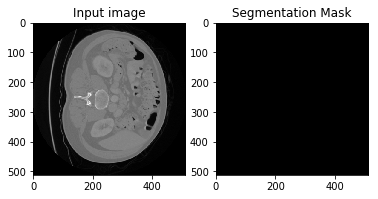



('Task: ', 'Task03_Liver')
num_train = 131, num_test = 70
Image dimensions:
Train:
(512, 512, 751)
(512, 512, 254)
(512, 512, 96)
(512, 512, 574)
(512, 512, 407)
Test:
(512, 512, 818)
(512, 512, 419)
(512, 512, 271)
(512, 512, 839)
(512, 512, 820)
Image Min-Max values: Image=5733.0,-1024.0 and label=2.0,0.0
('Number of subclasses = ', 3)


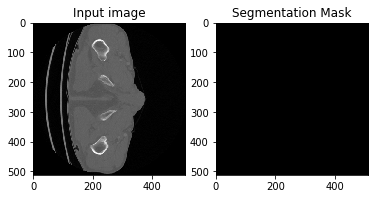



('Task: ', 'Task06_Lung')
num_train = 63, num_test = 32
Image dimensions:
Train:
(512, 512, 245)
(512, 512, 125)
(512, 512, 636)
(512, 512, 266)
(512, 512, 304)
Test:
(512, 512, 252)
(512, 512, 199)
(512, 512, 565)
(512, 512, 580)
(512, 512, 224)
Image Min-Max values: Image=3071.0,-1024.0 and label=1.0,0.0
('Number of subclasses = ', 2)


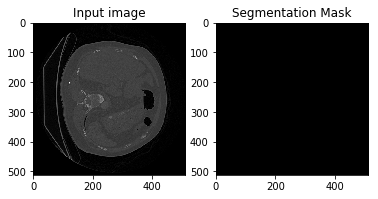



('Task: ', 'Task01_BrainTumour')
num_train = 484, num_test = 266
Image dimensions:
Train:
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
Test:
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
Image Min-Max values: Image=3111.0,0.0 and label=3.0,0.0
('Number of subclasses = ', 4)


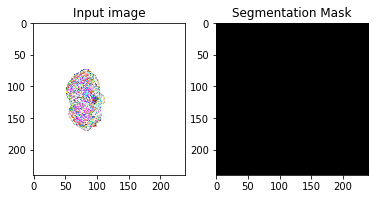



('Task: ', 'Task05_Prostate')
num_train = 32, num_test = 16
Image dimensions:
Train:
(320, 320, 20, 2)
(320, 320, 20, 2)
(320, 320, 20, 2)
(320, 320, 20, 2)
(320, 320, 20, 2)
Test:
(320, 320, 20, 2)
(320, 320, 15, 2)
(320, 320, 20, 2)
(320, 320, 20, 2)
(320, 320, 20, 2)
Image Min-Max values: Image=2754.0,0.0 and label=2.0,0.0
('Number of subclasses = ', 3)


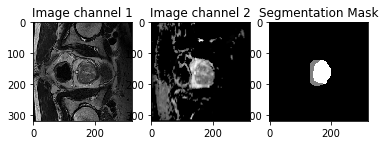

('Task: ', 'Task02_Heart')
num_train = 20, num_test = 10
Image dimensions:
Train:
(320, 320, 110)
(320, 320, 110)
(320, 320, 110)
(320, 320, 120)
(320, 320, 110)
Test:
(400, 400, 180)
(320, 320, 140)
(320, 320, 100)
(320, 320, 137)
(320, 320, 110)
Image Min-Max values: Image=2045.0,0.0 and label=1.0,0.0
('Number of subclasses = ', 2)


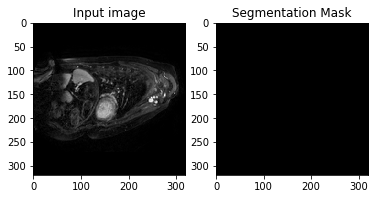



('Task: ', 'Task04_Hippocampus')
num_train = 260, num_test = 130
Image dimensions:
Train:
(38, 48, 39)
(35, 53, 35)
(35, 48, 42)
(33, 47, 34)
(37, 56, 36)
Test:
(35, 54, 32)
(35, 51, 38)
(37, 51, 32)
(33, 48, 37)
(34, 47, 43)
Image Min-Max values: Image=2037.36889648,0.0 and label=2.0,0.0
('Number of subclasses = ', 3)


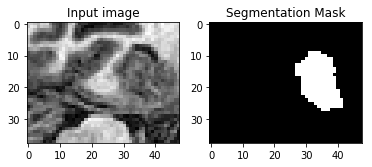

In [4]:
data_path = '/media/DATA/Datasets/medseg_decathlon/'
tasks = [x for x in os.listdir(data_path) if x.startswith('Task')]

for task in tasks:
    print('Task: ', task)
    
    # Paths
    path_tr = data_path+task+'/imagesTr'
    path_tr_label = data_path+task+'/labelsTr'
    path_ts = data_path+task+'/imagesTs'
    imglist_tr = glob(path_tr+'/*.gz')
    imglist_tr_label = glob(path_tr_label+'/*.gz')
    imglist_ts = glob(path_ts+'/*.gz')
    print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))
    print('Image dimensions:')
    print('Train:')
    
    # Dimensions
    for img_name in imglist_tr[:5]:
        img = nib.load(img_name)
        print(img.shape)
    print('Test:')
    for img_name in imglist_ts[:5]:
        img = nib.load(img_name)
        print(img.shape)
    
    # Find number of sub labels
    
    # Images
    img = nib.load(imglist_tr[0]).get_fdata()
    label = nib.load(imglist_tr_label[0]).get_fdata()
    print('Image Min-Max values: Image={},{} and label={},{}'.format(img.max(), img.min(), label.max(), label.min()))
    print('Number of subclasses = ', int(label.max())+1)
    if task=='Task05_Prostate':
        ax = plt.subplot('131')
        ax.imshow(img[:,:,10,0], cmap='gray')
        ax.set_title('Image channel 1')
        ax = plt.subplot('132')
        ax.imshow(img[:,:,10,1], cmap='gray')
        ax.set_title('Image channel 2')
        ax = plt.subplot('133')
        ax.imshow(label[:,:,10], cmap='gray')
        ax.set_title('Segmentation Mask')
        plt.show()
    else:
        ax = plt.subplot('121')
        ax.imshow(img[:,:,10], cmap='gray')
        ax.set_title('Input image')
        ax = plt.subplot('122')
        ax.imshow(label[:,:,10], cmap='gray')
        ax.set_title('Segmentation Mask')
        plt.show()
        print('\n')